In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [2]:
# 1. 데이터 불러오기
df = pd.read_csv("/content/구리 선물 과거 데이터.csv")
df

,날짜,종가,시가,고가,저가,거래량,변동 %
0,2025- 04- 07,4.2975,4.1758,4.3320,4.1085,18.45K,2.91%
1,2025- 04- 06,4.1760,4.3113,4.3113,4.0300,7.00K,-5.13%
2,2025- 04- 04,4.4020,4.8140,4.8245,4.3720,NaN,-8.83%
3,2025- 04- 03,4.8285,5.0000,5.0000,4.8080,69.87K,-4.21%
4,2025- 04- 02,5.0405,5.0295,5.1450,4.9850,46.22K,0.11%
...,...,...,...,...,...,...,...
2616,2015- 03- 13,2.6635,2.6620,2.6905,2.6465,38.56K,0.19%
2617,2015- 03- 12,2.6585,2.6055,2.6800,2.5985,60.64K,2.01%
2618,2015- 03- 11,2.6060,2.6200,2.6475,2.5995,40.77K,-0.69%
2619,2015- 03- 10,2.6240,2.6680,2.6695,2.6055,42.21K,-1.74%


In [3]:
# 2. 컬럼 값 확인
df.columns

Index(['날짜', '종가', '시가', '고가', '저가', '거래량', '변동 %'], dtype='object')

In [4]:
# '거래량'에서 'K' 제거 후 숫자로 변환
df['거래량'] = df['거래량'].str.replace('K', '').astype(float) * 1000
df['거래량']

,거래량
0,18450.0
1,7000.0
2,NaN
3,69870.0
4,46220.0
...,...
2616,38560.0
2617,60640.0
2618,40770.0
2619,42210.0


In [5]:
# 3. null 값 확인
df.isnull().sum()

,0
날짜,0
종가,0
시가,0
고가,0
저가,0
거래량,82
변동 %,0


In [6]:
# 4. null 값을 드롭
df_after_drop = df.dropna()
df_after_drop

,날짜,종가,시가,고가,저가,거래량,변동 %
0,2025- 04- 07,4.2975,4.1758,4.3320,4.1085,18450.0,2.91%
1,2025- 04- 06,4.1760,4.3113,4.3113,4.0300,7000.0,-5.13%
3,2025- 04- 03,4.8285,5.0000,5.0000,4.8080,69870.0,-4.21%
4,2025- 04- 02,5.0405,5.0295,5.1450,4.9850,46220.0,0.11%
5,2025- 04- 01,5.0350,5.0550,5.1155,5.0045,49680.0,0.02%
...,...,...,...,...,...,...,...
2616,2015- 03- 13,2.6635,2.6620,2.6905,2.6465,38560.0,0.19%
2617,2015- 03- 12,2.6585,2.6055,2.6800,2.5985,60640.0,2.01%
2618,2015- 03- 11,2.6060,2.6200,2.6475,2.5995,40770.0,-0.69%
2619,2015- 03- 10,2.6240,2.6680,2.6695,2.6055,42210.0,-1.74%


In [8]:
df = df_after_drop
df

,날짜,종가,시가,고가,저가,거래량,변동 %
0,2025- 04- 07,4.2975,4.1758,4.3320,4.1085,18450.0,2.91%
1,2025- 04- 06,4.1760,4.3113,4.3113,4.0300,7000.0,-5.13%
3,2025- 04- 03,4.8285,5.0000,5.0000,4.8080,69870.0,-4.21%
4,2025- 04- 02,5.0405,5.0295,5.1450,4.9850,46220.0,0.11%
5,2025- 04- 01,5.0350,5.0550,5.1155,5.0045,49680.0,0.02%
...,...,...,...,...,...,...,...
2616,2015- 03- 13,2.6635,2.6620,2.6905,2.6465,38560.0,0.19%
2617,2015- 03- 12,2.6585,2.6055,2.6800,2.5985,60640.0,2.01%
2618,2015- 03- 11,2.6060,2.6200,2.6475,2.5995,40770.0,-0.69%
2619,2015- 03- 10,2.6240,2.6680,2.6695,2.6055,42210.0,-1.74%


In [10]:
# 날짜 형식으로 변환하고 정렬
df['날짜'] = pd.to_datetime(df['날짜'])
df = df.sort_values('날짜')

# '변동 %'에서 % 기호 제거 후 숫자로 변환
df['변동 %'] = df['변동 %'].str.replace('%', '').astype(float)

# 사용할 피처 선택
features = ['종가', '시가', '고가', '저가', '거래량']
df_features = df[features].copy()

AttributeError: Can only use .str accessor with string values!

In [11]:
# 변동 %에서 %를 제외한 것을 확인.
df

,날짜,종가,시가,고가,저가,거래량,변동 %
2620,2015-03-09,2.6705,2.6135,2.6775,2.5925,50100.0,2.36
2619,2015-03-10,2.6240,2.6680,2.6695,2.6055,42210.0,-1.74
2618,2015-03-11,2.6060,2.6200,2.6475,2.5995,40770.0,-0.69
2617,2015-03-12,2.6585,2.6055,2.6800,2.5985,60640.0,2.01
2616,2015-03-13,2.6635,2.6620,2.6905,2.6465,38560.0,0.19
...,...,...,...,...,...,...,...
5,2025-04-01,5.0350,5.0550,5.1155,5.0045,49680.0,0.02
4,2025-04-02,5.0405,5.0295,5.1450,4.9850,46220.0,0.11
3,2025-04-03,4.8285,5.0000,5.0000,4.8080,69870.0,-4.21
1,2025-04-06,4.1760,4.3113,4.3113,4.0300,7000.0,-5.13


In [12]:
# 정규화
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_features)

In [13]:
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:i+seq_length])
        y.append(data[i+seq_length, 0])  # 종가만 예측
    return np.array(x), np.array(y)

SEQ_LENGTH = 60
X, y = create_sequences(scaled_data, SEQ_LENGTH)

# 훈련셋
X_train, y_train = X, y

In [14]:
# LSTM 모델 설계 및 학습
model = Sequential([
    LSTM(64, return_sequences=False, input_shape=(SEQ_LENGTH, X.shape[2])),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0360
Epoch 2/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 7.2206e-04
Epoch 3/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 7.0813e-04
Epoch 4/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 5.8698e-04
Epoch 5/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 6.0927e-04
Epoch 6/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 6.0626e-04
Epoch 7/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 5.6657e-04
Epoch 8/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 5.6535e-04
Epoch 9/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 5.1938e-04
Epoch 10/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 4.6596e-04
Epoch 11/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.9746e-04
Epoch 12/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.8584e-04
Epoch 13/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 4.6665e-04
Epoch 14/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 5.4930e-04
Epoch 15/20
78/78 ━━━━━━━━━━━━

In [15]:
# 예측할 날짜 수 (영업일 기준)
predict_days = 278

# 마지막 시퀀스 복사
last_sequence = scaled_data[-SEQ_LENGTH:].copy()
predicted_prices = []

for _ in range(predict_days):
    input_seq = last_sequence[-SEQ_LENGTH:]
    input_seq = np.expand_dims(input_seq, axis=0)
    predicted_price = model.predict(input_seq)[0][0]

    # 미래에 사용할 임시 피처는 종가 값으로 채움
    new_row = np.array([predicted_price] * scaled_data.shape[1])
    last_sequence = np.vstack((last_sequence, new_row))

    predicted_prices.append(predicted_price)

# 예측 가격 역정규화
predicted_prices = scaler.inverse_transform(
    np.hstack((np.array(predicted_prices).reshape(-1,1),
               np.zeros((predict_days, scaled_data.shape[1]-1))))  # 나머지는 0
)[:, 0]  # 종가만

# 예측 날짜 생성
last_date = df['날짜'].max()
future_dates = pd.bdate_range(start=last_date + pd.Timedelta(days=1), periods=predict_days)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━

In [16]:
# NaN 제거
predicted_prices = np.array(predicted_prices)  # 리스트 → NumPy 배열
valid_indices = ~np.isnan(predicted_prices)
future_dates_valid = future_dates[valid_indices]
predicted_prices_valid = predicted_prices[valid_indices]

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/loc

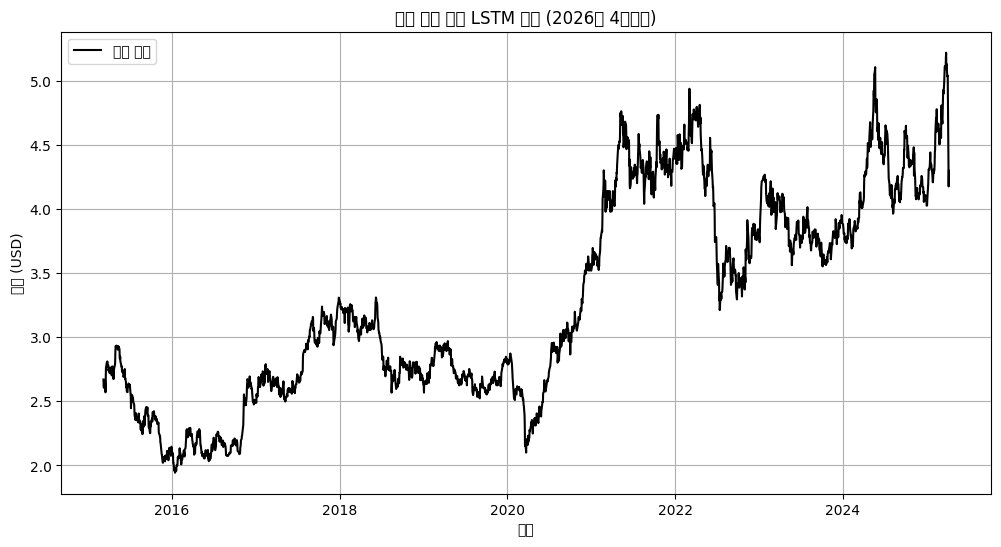

In [17]:
plt.figure(figsize=(12,6))
plt.plot(df['날짜'], df['종가'], label='실제 종가', color='black')
# plt.plot(future_dates_valid, predicted_prices_valid, label='예측 종가 (~2026년 4월)', color='red', linestyle='--')
plt.title('구리 종가 예측 LSTM 결과 (2026년 4월까지)')
plt.xlabel('날짜')
plt.ylabel('종가 (USD)')
plt.legend()
plt.grid(True)
plt.show();

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# 평가 대상: 테스트셋이 존재한다면, 그에 대한 예측값과 실제값 비교
# 여기서는 최근 일정 구간을 테스트셋으로 분리해 평가하는 방식

# 1. 평가 구간 지정 (예: 마지막 365일치)
seq_length = 365

test_size = 365
train_data = scaled_data[:-test_size]
test_data = scaled_data[-seq_length-test_size:]

X_test = []
y_test = []

for i in range(seq_length, len(test_data)):
    X_test.append(test_data[i-seq_length:i])
    y_test.append(test_data[i, 0])  # 종가만 평가

X_test = np.array(X_test)
y_test = np.array(y_test)

# 예측
y_pred = model.predict(X_test)

# Check for NaN in y_pred and handle them (e.g., replace with 0)
y_pred = np.nan_to_num(y_pred)

# 역정규화
y_test_inverse = scaler.inverse_transform(np.concatenate((y_test.reshape(-1,1), np.zeros((y_test.shape[0], scaled_data.shape[1]-1))), axis=1))[:,0]
y_pred_inverse = scaler.inverse_transform(np.concatenate((y_pred, np.zeros((y_pred.shape[0], scaled_data.shape[1]-1))), axis=1))[:,0]

# 지표 계산
mae = mean_absolute_error(y_test_inverse, y_pred_inverse)
mse = mean_squared_error(y_test_inverse, y_pred_inverse)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inverse, y_pred_inverse)

# 출력
print(f"📊 평가 지표 (최근 {test_size}일 기준)")
print(f"MAE  : {mae:.4f}")
print(f"MSE  : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step
📊 평가 지표 (최근 365일 기준)
MAE  : 0.0687
MSE  : 0.0087
RMSE : 0.0931
R²   : 0.9335


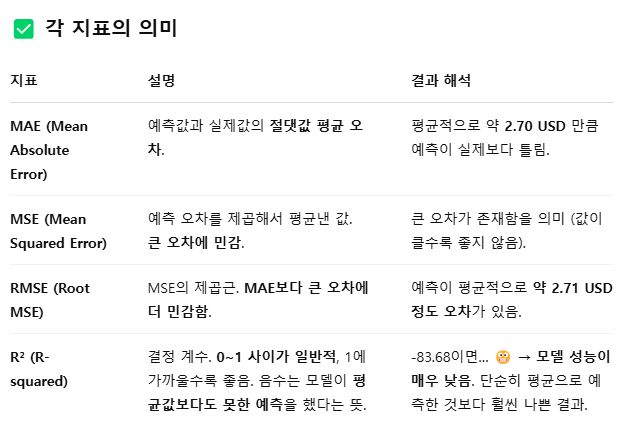